Results of performing DAT on branch 3 with an ASR model that has not been fine-tuned on common voice.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from os import listdir
from scipy import interpolate

In [2]:
folder = "../../../logs/exp/dat-b3"
df = {
    "train": pd.read_pickle(f"{folder}/dataframes/train.pkl"),
    "val": pd.read_pickle(f"{folder}/dataframes/val.pkl")
}

In [3]:
df["train"].keys()

Index(['Total Loss (de)', 'ASR Loss (de)', 'AC Loss (de)', 'Total Loss (at)',
       'ASR Loss (at)', 'AC Loss (at)', 'Total Loss',
       'AC Loss (Val.) - unweighted avg.',
       'events.out.tfevents.1662018962.serv-9215.3985354.0',
       'events.out.tfevents.1662018962.serv-9215.3985354.0',
       'events.out.tfevents.1662018962.serv-9215.3985354.0',
       'events.out.tfevents.1662018962.serv-9215.3985354.0',
       'events.out.tfevents.1662018962.serv-9215.3985354.0',
       'events.out.tfevents.1662018962.serv-9215.3985354.0',
       'events.out.tfevents.1662018962.serv-9215.3985354.0',
       'events.out.tfevents.1662018962.serv-9215.3985354.0',
       'AC Loss (Val.) per correct accent_avg (unweighted)',
       'AC Loss (Val.) per correct accent_Accented',
       'AC Loss (Val.) per correct accent_Standard'],
      dtype='object')

In [4]:
df["val"].keys()

Index(['WER (Val.) - unweighted avg.', 'WER (Val.) per correct accent_fr',
       'Precision_avg', 'Precision_Accented',
       'WER (Val.) per correct accent_avg (unweighted)', 'F1-score_avg',
       'WER (Val.) per correct accent_at', 'WER (Val.) per correct accent_de',
       'WER (Val.) per correct accent_gb', 'Precision_Standard',
       'WER (Val.) per correct accent_ch', 'WER (Val.) per correct accent_it',
       'WER (Val.) per correct accent_ca',
       'events.out.tfevents.1662018962.serv-9215.3985354.0', 'Recall_Standard',
       'No. of times each accent was predicted_Standard', 'F1-score_Standard',
       'F1-score_Accented', 'No. of times each accent was predicted_Accented',
       'WER (Val.) per correct accent_ru', 'Recall_Accented',
       'WER (Val.) per correct accent_us',
       'No. of times each accent was predicted when the correct accent is Accented_Standard',
       'WER (Val.) per correct accent_de_al',
       'No. of times each accent was predicted when the c

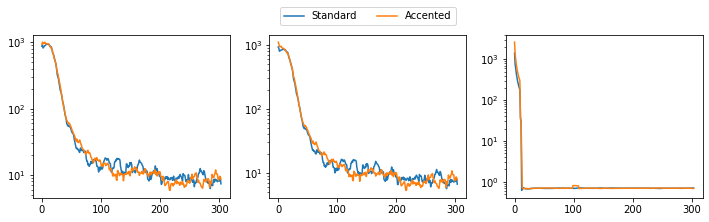

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
axes[0].plot(df["train"]["ASR Loss (de)"].head(304).rolling(10, min_periods=1).mean(), label="Standard")
axes[0].plot(df["train"]["ASR Loss (at)"].head(304).rolling(10, min_periods=1).mean(), label="Accented")
axes[1].plot(df["train"]["Total Loss (de)"].head(304).rolling(10, min_periods=1).mean(), label="Standard")
axes[1].plot(df["train"]["Total Loss (at)"].head(304).rolling(10, min_periods=1).mean(), label="Accented")
axes[2].plot(df["train"]["AC Loss (de)"].head(304).rolling(10, min_periods=1).mean(), label="Standard")
axes[2].plot(df["train"]["AC Loss (at)"].head(304).rolling(10, min_periods=1).mean(), label="Accented")
for i in range(3):
    axes[i].set_yscale("log")
axes[1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


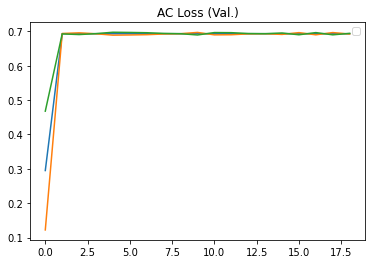

In [6]:
for col in df["train"].columns:
    if "per correct accent" in col:
        plt.plot(df["train"][col].head(20).rolling(1, min_periods=1).mean(), label=col[33:])
plt.title("AC Loss (Val.)")
plt.legend()

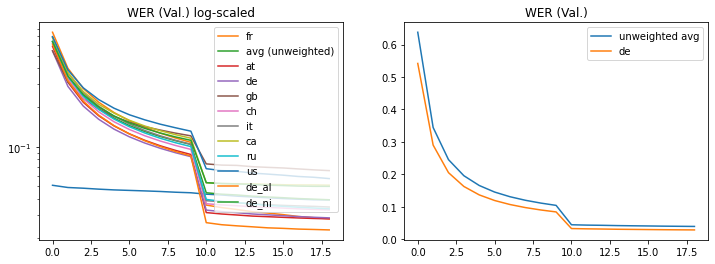

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
for col in df["val"].columns:
    if "WER" in col:
        axes[0].plot(df["val"][col].head(20).rolling(10, min_periods=1).mean(), label=col[30:])
axes[0].set_title("WER (Val.) log-scaled")
axes[0].set_yscale("log")
axes[0].legend()
axes[1].plot(df["val"]["WER (Val.) per correct accent_avg (unweighted)"].head(20).rolling(10, min_periods=1).mean(), label="unweighted avg")
axes[1].plot(df["val"]["WER (Val.) per correct accent_de"].head(20).rolling(10, min_periods=1).mean(), label="de")
axes[1].set_title("WER (Val.)")
axes[1].legend()

In [8]:
df["val"]["WER (Val.) per correct accent_avg (unweighted)"]

0     0.637914
1     0.050708
2     0.046832
3     0.046947
4     0.044989
5     0.044250
6     0.044292
7     0.043470
8     0.042272
9     0.040087
10    0.040613
11    0.039678
12    0.040816
13    0.038219
14    0.038912
15    0.038912
16    0.038323
17    0.039252
18    0.037974
Name: WER (Val.) per correct accent_avg (unweighted), dtype: float64

In [9]:
df["val"]["WER (Val.) - unweighted avg."]

0     0.050708
1     0.046832
2     0.046947
3     0.044989
4     0.044250
5     0.044292
6     0.043470
7     0.042272
8     0.040087
9     0.040613
10    0.039678
11    0.040816
12    0.038219
13    0.038912
14    0.038912
15    0.038323
16    0.039252
17    0.037974
18         NaN
Name: WER (Val.) - unweighted avg., dtype: float64